In [5]:
import pandas as pd           
import matplotlib.pyplot as plt

<>:106: SyntaxWarning: invalid escape sequence '\s'
<>:110: SyntaxWarning: invalid escape sequence '\s'
<>:106: SyntaxWarning: invalid escape sequence '\s'
<>:110: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\1452739553.py:106: SyntaxWarning: invalid escape sequence '\s'
  analyse_differents_vp("csv_iteration_2\same_ug_new_agents_csv_1\debate_2-10_data.csv")
C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\1452739553.py:110: SyntaxWarning: invalid escape sequence '\s'
  test = len(analyse_differents_vp(f"csv_iteration_{j}\same_ug_new_agents_csv_1\debate_{j}-{i}_data.csv"))


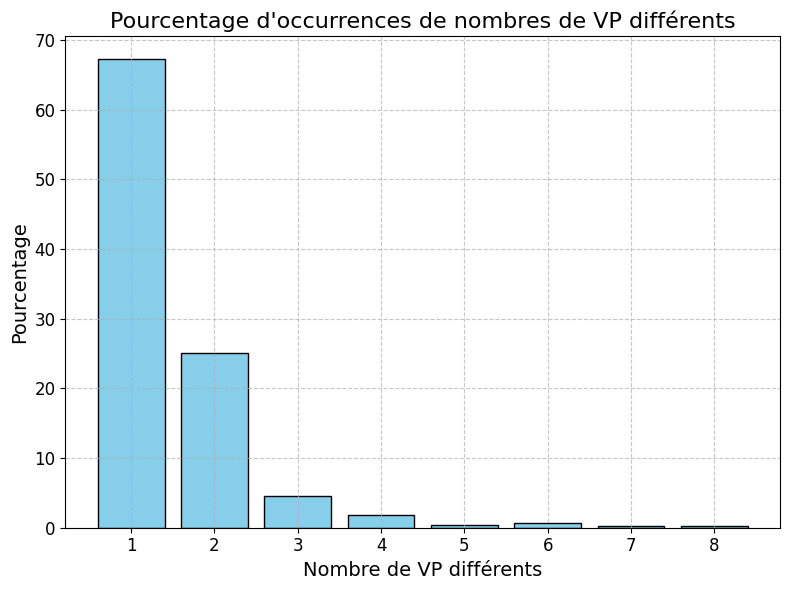

In [6]:
def analyse_differents_vp(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["Vp"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence

def analyse_mean_vp(df):
    Vpmean=0
    j=0
    for i in df["Vp"] : 
        j=j+1
        Vpmean=i+Vpmean
        
    return Vpmean/j

def analyse_mean_turn(df):
    turnmean=0
    j=0
    for i in df["numberOfTurn"] : 
        j=j+1
        turnmean=i+turnmean
        
    return turnmean/j

def analyse_differents_numberOfTurn(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["numberOfTurn"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence


def graph_NumberOfTurn(data_set):
   
    donnees=analyse_differents_numberOfTurn(data_set)
    tours = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(tours), 0.5)) 
    # Créer le graphique à barres
    plt.bar(tours, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Occurrences de tours')
    plt.xlabel('Nombre de tours')
    plt.ylabel('Occurrences')
    plt.xticks(tours)
    plt.show()
    plt.clf()
    
def graph_Vp(donnees) :   
    
    
    vps = list(donnees.keys())
    print(vps)
    occurrences = list(donnees.values())
    
    # Créer le graphique à barres
    plt.bar(vps, occurrences, color='blue', width=0.005)

    # Ajouter des titres et des libellés
    plt.title('Occurrence de VP')
    plt.xlabel('VP')
    plt.ylabel('Occurrences')
    plt.xticks(vps)
    plt.show()
    plt.clf()
    
def plot_dictionary(data):
    # Calcul de la somme totale des valeurs
    total = sum(data.values())
    
    # Calcul des pourcentages pour chaque valeur
    percentages = [val / total * 100 for val in data.values()]
    
    # Séparation des clés et des pourcentages calculés
    x = list(data.keys())
    y = percentages

    # Création du graphique
    plt.figure(figsize=(8, 6))  # Définit la taille du graphique
    plt.bar(x, y, color='skyblue', edgecolor='black')  # Couleur des barres et des bordures
    
    # Ajout de titre et d'étiquettes
    plt.title('Pourcentage d\'occurrences de nombres de VP différents', fontsize=16)
    plt.xlabel('Nombre de VP différents', fontsize=14)
    plt.ylabel('Pourcentage', fontsize=14)

    # Ajustement des étiquettes de l'axe x
    plt.xticks(x, fontsize=12)  
    
    # Ajustement des étiquettes de l'axe y
    plt.yticks(fontsize=12)

    # Affichage du graphique
    plt.grid(True, linestyle='--', alpha=0.7)  # Ajout d'une grille en pointillés
    plt.tight_layout()  # Ajustement automatique des marges
    plt.show()

analyse_differents_vp("csv_iteration_2\same_ug_new_agents_csv_1\debate_2-10_data.csv")
dic={}
for j in range(1,10):
    for i in range(1,120):
        test = len(analyse_differents_vp(f"csv_iteration_{j}\same_ug_new_agents_csv_1\debate_{j}-{i}_data.csv"))
        if(test in dic.keys()):
            dic[test]= dic[test]+1
        else :
            dic[test]=1
plot_dictionary(dic)
    



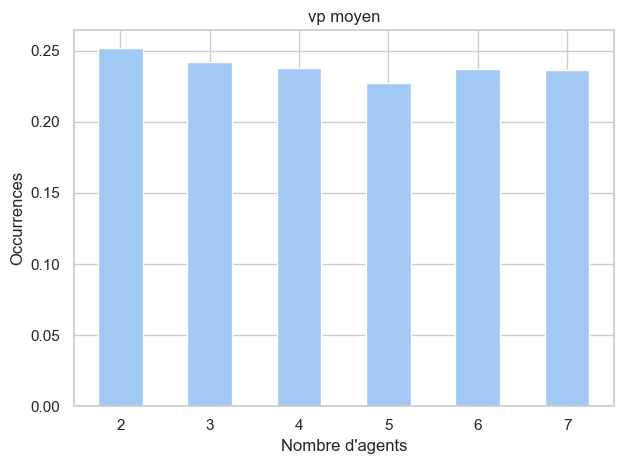

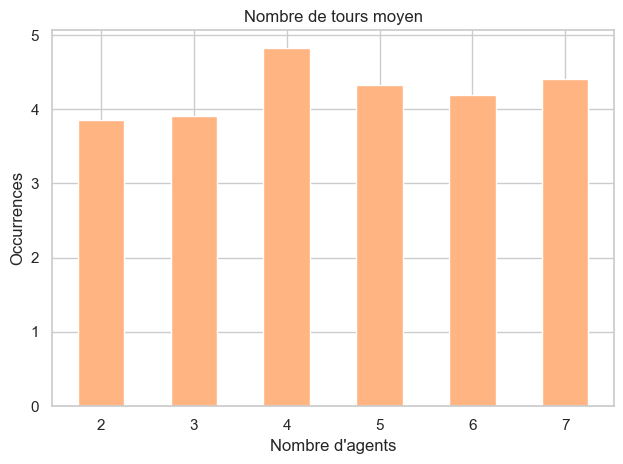

<Figure size 640x480 with 0 Axes>

In [7]:

import os

import seaborn as sns
def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "Le chemin spécifié n'est pas un dossier."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df


def all_graph_stat_vp(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    
def all_graph_stat_turn(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    

# Utiliser Seaborn pour des graphiques plus esthétiques
sns.set(style="whitegrid")

def affichage_graph_vp(donnees):
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5))
    
    # Choisir une couleur plus agréable
    couleur = sns.color_palette("pastel")[0]
    
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color=couleur, width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('vp moyen')
    plt.xlabel('Nombre d\'agents')
    plt.ylabel('Occurrences')
    plt.xticks(vp)  # Étiquettes sans rotation
    plt.tight_layout()  # Pour une meilleure gestion des espaces
    plt.show()
    plt.clf()

def affichage_graph_turn(donnees):
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5))
    
    # Choisir une couleur plus agréable
    couleur = sns.color_palette("pastel")[1]
    
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color=couleur, width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Nombre de tours moyen')
    plt.xlabel('Nombre d\'agents')
    plt.ylabel('Occurrences')
    plt.xticks(vp)  # Étiquettes sans rotation
    plt.tight_layout()  # Pour une meilleure gestion des espaces
    plt.show()
    plt.clf()
    

path="csv_iteration_10/same_ug_new_agents_csv_1"
liste_of_df=create_csv_link(path)   
affichage_graph_vp(all_graph_stat_vp(liste_of_df))
affichage_graph_turn(all_graph_stat_turn(liste_of_df))


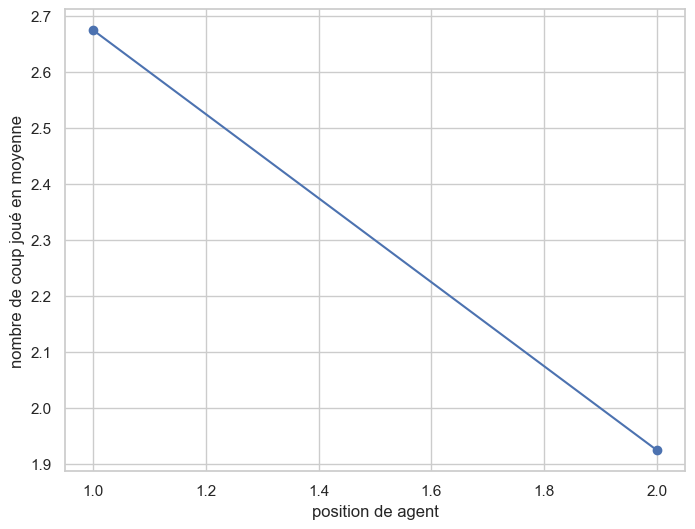

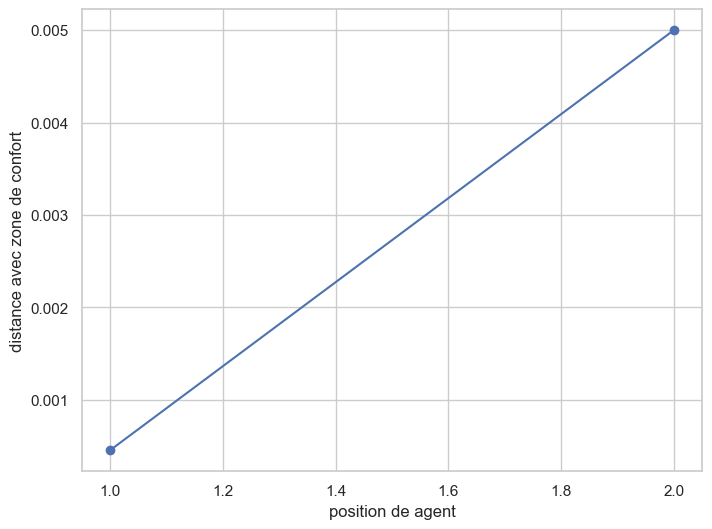

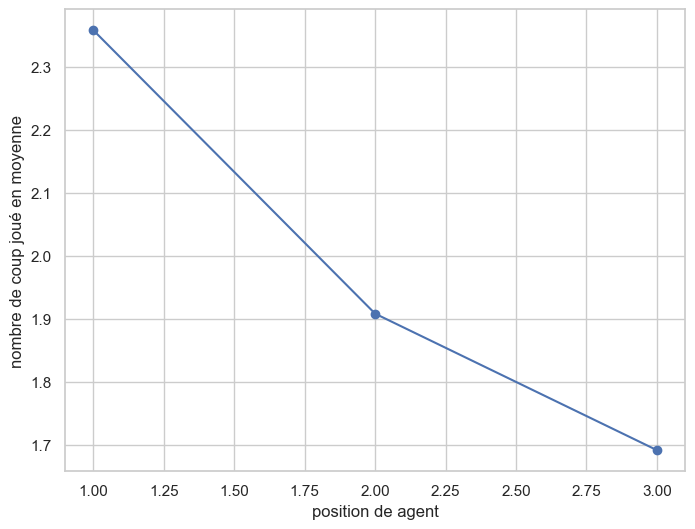

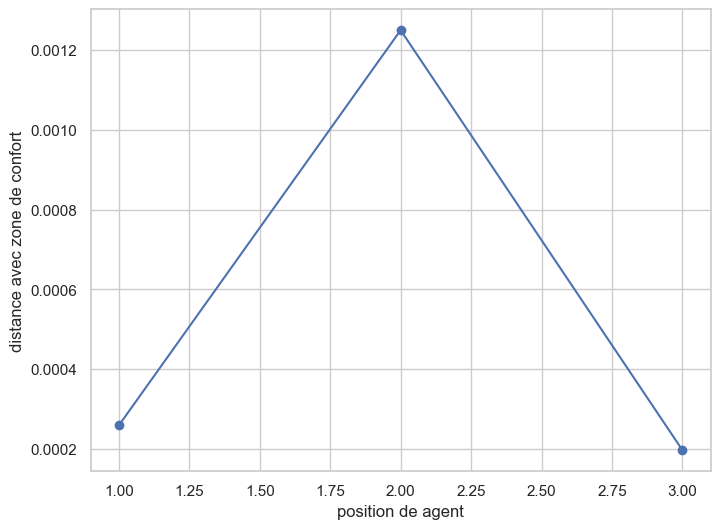

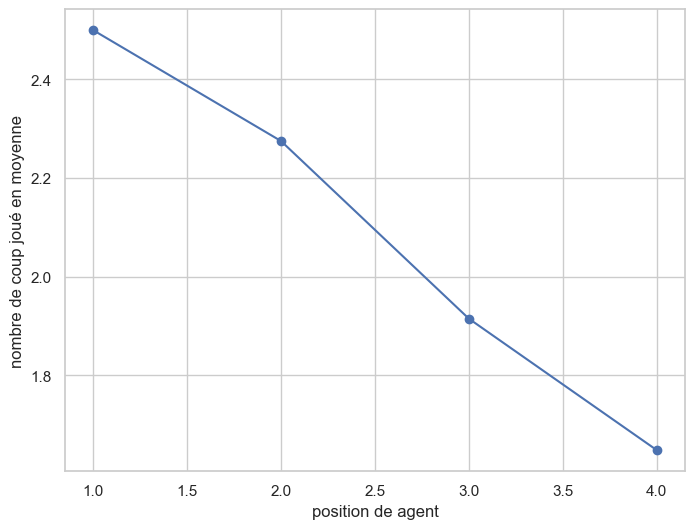

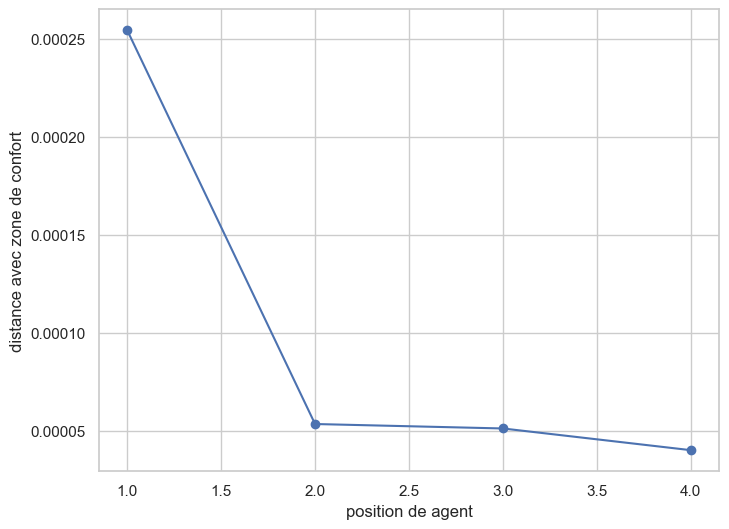

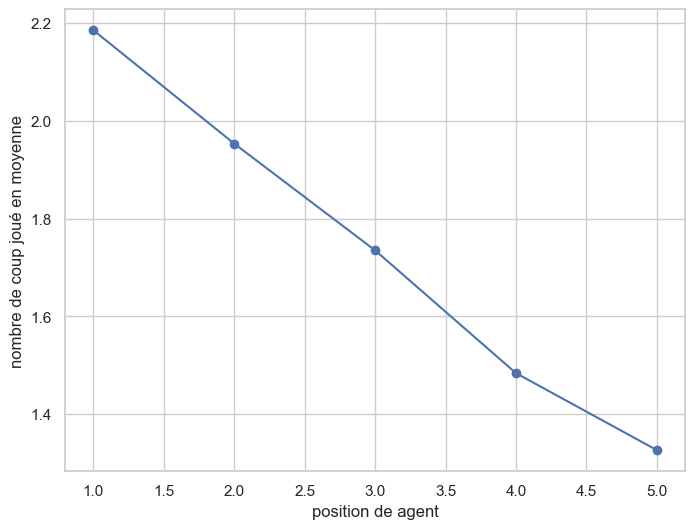

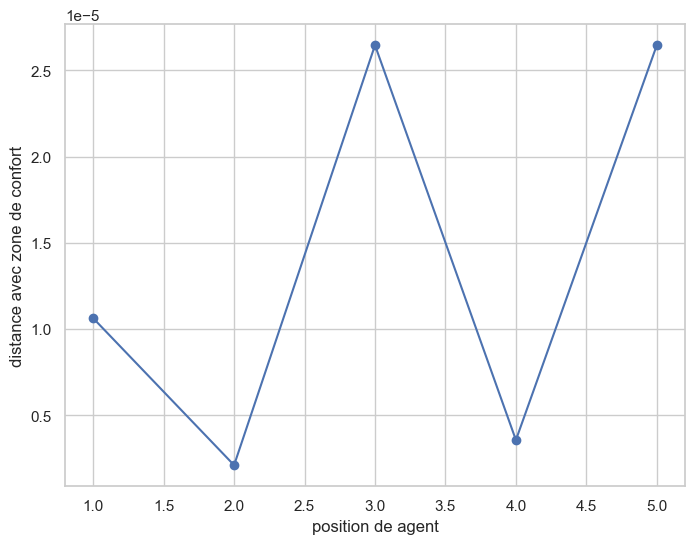

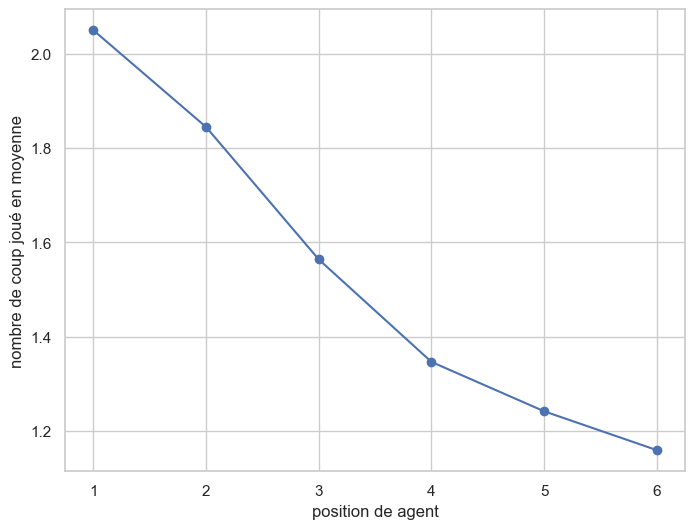

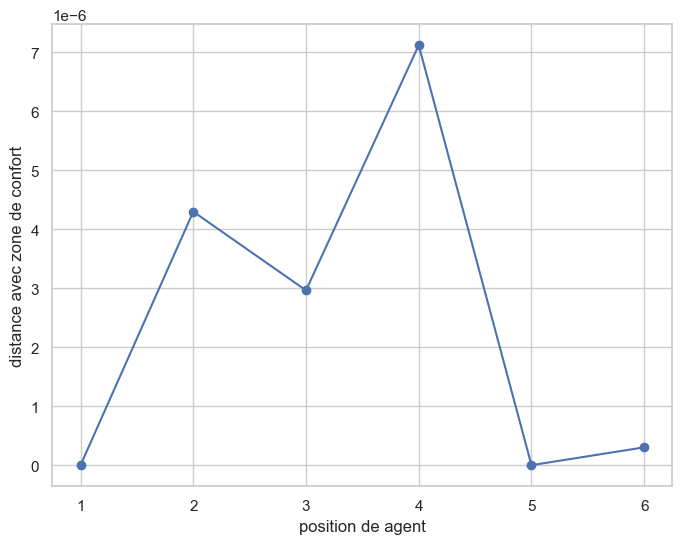

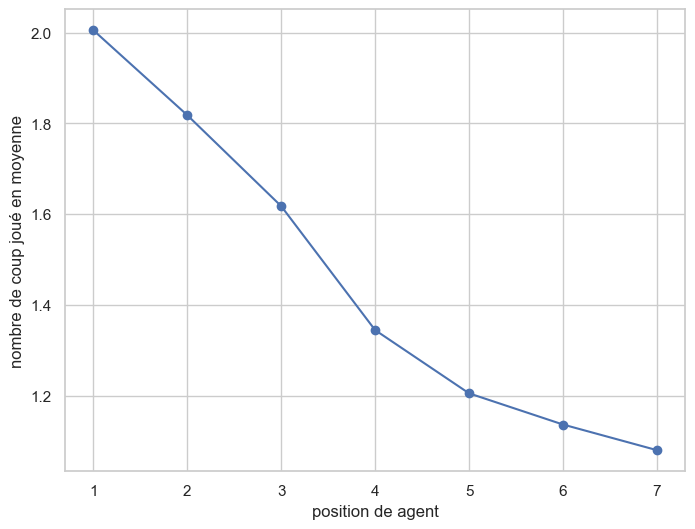

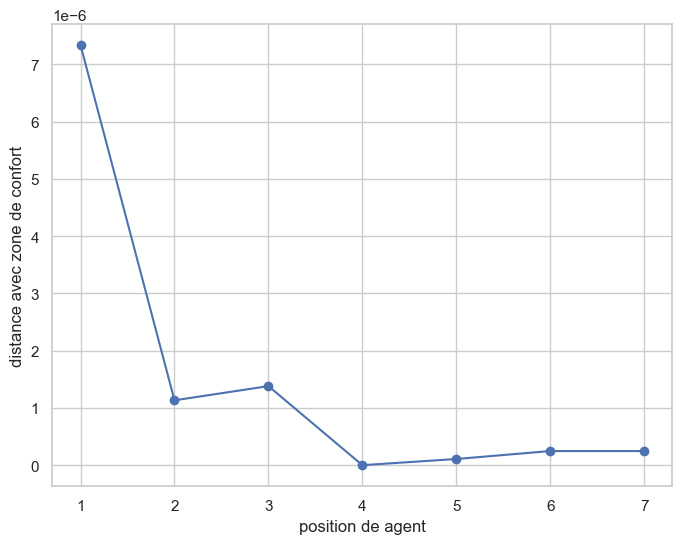

{1: 2.675, 2: 1.925}
{1: 2.3583333333333334, 2: 1.9083333333333334, 3: 1.6916666666666667}
{1: 2.5, 2: 2.275, 3: 1.9145833333333333, 4: 1.6479166666666667}
{1: 2.185416666666667, 2: 1.9533333333333334, 3: 1.735, 4: 1.48375, 5: 1.32625}
{1: 2.0503472222222223, 2: 1.844861111111111, 3: 1.5636805555555555, 4: 1.3460416666666666, 5: 1.24125, 6: 1.15875}
{1: 2.005376984126984, 2: 1.818095238095238, 3: 1.617529761904762, 4: 1.344265873015873, 5: 1.2048611111111112, 6: 1.136111111111111, 7: 1.0795833333333333}


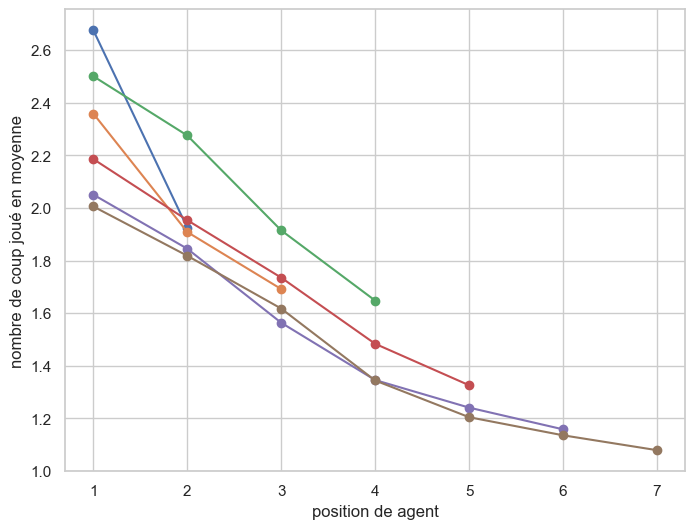

{1: 0.0004545454545454547, 2: 0.005}
{1: 0.0002585158150851581, 2: 0.0012500000000000002, 3: 0.00019654088050314437}
{1: 0.00025452488687782807, 2: 5.341880341880346e-05, 3: 5.114566284779056e-05, 4: 4.006410256410254e-05}
{1: 1.062537947783848e-05, 2: 2.1043771043771178e-06, 3: 2.6455026455026453e-05, 4: 3.5612535612535717e-06, 5: 2.6455026455026453e-05}
{1: 0.0, 2: 4.299562226391496e-06, 3: 2.9639900329555503e-06, 4: 7.1225071225071205e-06, 5: 0.0, 6: 3.023705853894519e-07}
{1: 7.332643202208419e-06, 2: 1.1322463768115942e-06, 3: 1.3802622498274674e-06, 4: 0.0, 5: 1.078329882677708e-07, 6: 2.464754017549048e-07, 7: 2.464754017549053e-07}


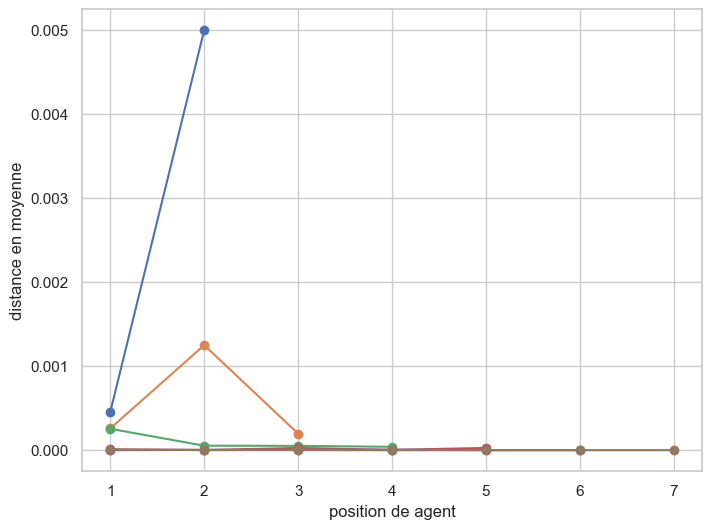

In [8]:

def number_argument_play(dfs,nbARG):
    taille = len(dfs[0])
    dpn = {}
    for i in range(nbARG):
        dpn[i+1]=0
    
    for df in dfs : 
        for j in range(taille) :
            ordre=1
            for i in df["order"][j].split(",") :
                dpn[ordre]=int(df[i[1]][j].split("None")[len(df[i[1]][j].split("None"))-1].split(",")[1])+int(dpn[ordre])
                ordre=ordre+1
    
    for i in range(nbARG):
        dpn[i+1]=dpn[i+1]/(taille*len(dfs))
   
    return dpn

def number_argument_play(dfs,nbARG):
    taille = len(dfs[0])
    dpn = {}
    for i in range(nbARG):
        dpn[i+1]=0
    
    for df in dfs : 
        for j in range(taille) :
            ordre=1
            for i in df["order"][j].split(",") :
                dpn[ordre]=int(df[i[1]][j].split("None")[len(df[i[1]][j].split("None"))-1].split(",")[1])+int(dpn[ordre])
                ordre=ordre+1
    
    for i in range(nbARG):
        dpn[i+1]=dpn[i+1]/(taille*len(dfs))
   
    return dpn
def number_argument_play_zone_de_confort(dfs,nbARG):
    taille = len(dfs[0])
    dpn = {}
    for i in range(nbARG):
        dpn[i+1]=0
    
    for df in dfs : 
        for j in range(taille) :
            ordre=1
            for i in df["order"][j].split(",") :
                dpn[ordre]=abs(float(df[i[1]][j].split("None")[len(df[i[1]][j].split("None"))-1].split(",")[4].split("]")[0]))+int(dpn[ordre])
                ordre=ordre+1
    
    for i in range(nbARG):
        dpn[i+1]=dpn[i+1]/(taille*len(dfs))
   
    return dpn
def afficher_graphique(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    cles = list(dictionnaire.keys())
    valeurs = list(dictionnaire.values())
    
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('nombre de coup joué en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
    
def afficher_graphique2(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    cles = list(dictionnaire.keys())
    valeurs = list(dictionnaire.values())
    
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('distance avec zone de confort')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
    
def afficher_graphique_all_graph(liste_of_df):
    
    plt.figure(figsize=(8, 6))
    for i in range(2,8):
        dictionnaire = number_argument_play(createAgentNumber(i,liste_of_df),i)
        print(dictionnaire)
        cles = list(dictionnaire.keys())
        valeurs = list(dictionnaire.values())
        
        plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('nombre de coup joué en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
    
def afficher_graphique_all_graph2(liste_of_df):
    
    plt.figure(figsize=(8, 6))
    for i in range(2,8):
        dictionnaire = number_argument_play_zone_de_confort(createAgentNumber(i,liste_of_df),i)
        print(dictionnaire)
        cles = list(dictionnaire.keys())
        valeurs = list(dictionnaire.values())
        
        plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('distance en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
  
def createAgentNumber(number,liste_of_df):
    test=[] 
    for i in liste_of_df:
        if len(i["order"][0].split(","))==number:
            test.append(i)
    return test

for i in range(2,8):
    afficher_graphique(number_argument_play(createAgentNumber(i,liste_of_df),i))
    afficher_graphique2(number_argument_play_zone_de_confort(createAgentNumber(i,liste_of_df),i))
    
    
afficher_graphique_all_graph(liste_of_df)
afficher_graphique_all_graph2(liste_of_df)
        

 0.08502024291497978]
 -0.03404791929382092]
 0.5192307692307692]
 -0.03076923076923077]
 0.054945054945054916]
 0.16923076923076924]
 0.07046070460704612]
 0.02777777777777779]
 0.013998250218722724]
 0.02777777777777779]
 0.02777777777777779]
 -0.02550091074681235]
 0.1777777777777778]
 0.07777777777777783]
 0.03864734299516909]
 0.017777777777777837]
 -0.037606837606837584]
 0.2777777777777778]
 -0.0222222222222222]
 -0.0222222222222222]
 0.43589743589743585]
 0.16923076923076924]
 -0.03404791929382092]
 0.23076923076923078]
 0.054945054945054916]
 -0.02315677402182592]
 0.019230769230769273]
 0.14423076923076922]
 -0.01179112857944975]
 0.43589743589743585]
 -0.03076923076923077]
 0.009230769230769265]
 0.009230769230769265]
 -0.008547008547008572]
 0.017777777777777837]
 -0.04575163398692808]
 0.018741633199464508]
 0.05684754521963825]
 -0.037037037037037035]
 0.1111111111111111]
 -0.015325670498084254]
 -0.004098360655737682]
 0.0357142857142857]
 0.06578947368421056]
 0.25]
 -0

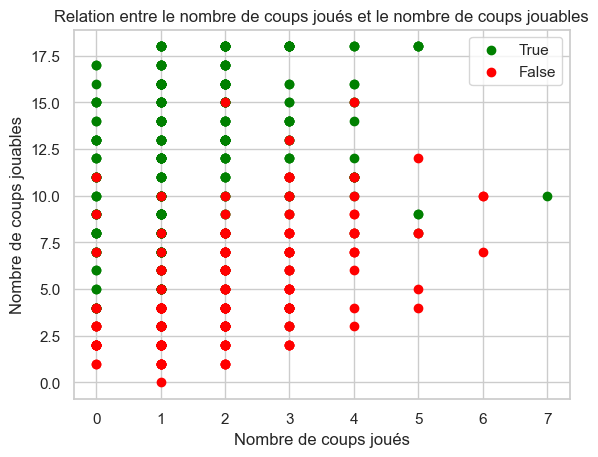

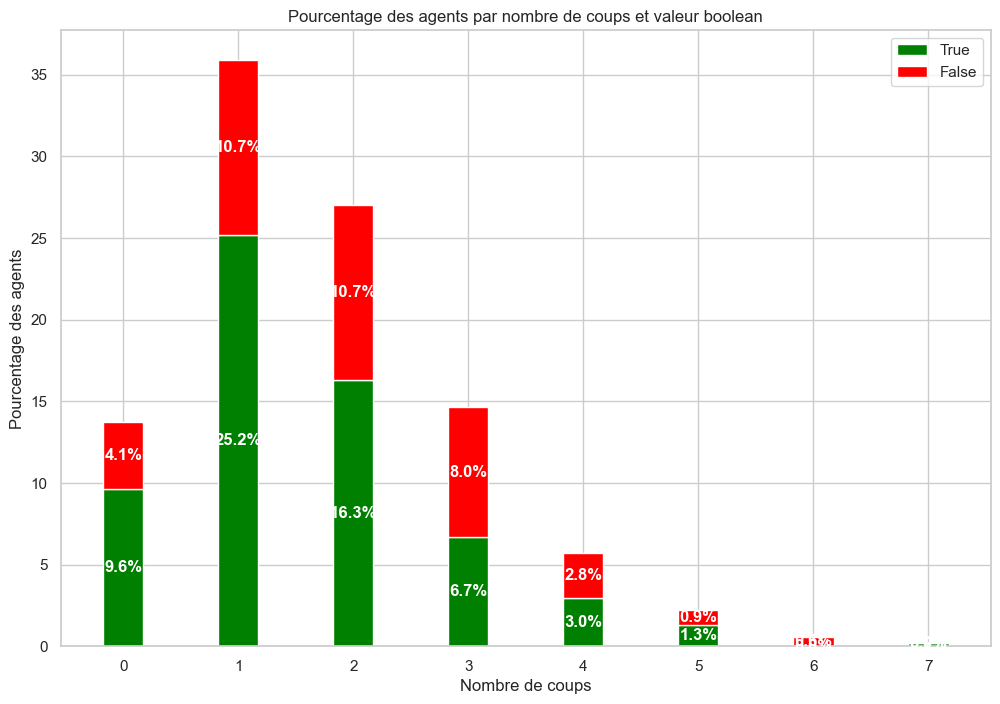

In [9]:
import numpy as np
def number_argument_play_all_point(dfs):
    
    dpn = []
    
    
    for df in dfs : 
            for i in range(len(df["order"][0].split(","))) :
                print(df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[4])
                boolean=df[f"{i}"][0].split(",")[1].strip()
                nb_coup_play=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[1]
                nb_coup_possible=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[3]
                distance=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[4]
                dpn.append([boolean,nb_coup_play,nb_coup_possible,distance])
    
   
    
    return dpn
def plot_agents_bar_chart(data):
    # Création d'un dictionnaire pour stocker le nombre d'agents par nombre de coups et valeur boolean
    agent_counts = {}

    for item in data:
        # Récupération du nombre de coups et de la valeur boolean
        coup = int(item[1].strip())
        boolean = item[0]

        # Mise à jour du dictionnaire
        if coup not in agent_counts:
            agent_counts[coup] = {'True': 0, 'False': 0}
        agent_counts[coup][boolean] += 1

    # Calcul du nombre total d'agents
    total_agents = sum(sum(counts.values()) for counts in agent_counts.values())

    # Préparation des données pour le graphique
    coups = sorted(agent_counts.keys())
    true_counts = [agent_counts[coup]['True'] for coup in coups]
    false_counts = [agent_counts[coup]['False'] for coup in coups]

    # Calcul des pourcentages par rapport au nombre total d'agents
    true_percentages = [count / total_agents * 100 for count in true_counts]
    false_percentages = [count / total_agents * 100 for count in false_counts]

    # Création du diagramme en barres
    width = 0.35  # Largeur des barres
    fig, ax = plt.subplots(figsize=(12, 8))
    ind = np.arange(len(coups))  # Emplacement des barres

    p1 = ax.bar(ind, true_percentages, width, color='green', label='True')
    p2 = ax.bar(ind, false_percentages, width, color='red', bottom=true_percentages, label='False')

    ax.set_xlabel('Nombre de coups')
    ax.set_ylabel('Pourcentage des agents')
    ax.set_title('Pourcentage des agents par nombre de coups et valeur boolean')
    ax.set_xticks(ind)
    ax.set_xticklabels(coups)
    ax.legend()

    # Ajouter des annotations pour les pourcentages sur les barres
    for i in range(len(ind)):
        ax.text(ind[i], true_percentages[i] / 2, f'{true_percentages[i]:.1f}%', ha='center', va='center', color='white', fontweight='bold')
        ax.text(ind[i], true_percentages[i] + false_percentages[i] / 2, f'{false_percentages[i]:.1f}%', ha='center', va='center', color='white', fontweight='bold')

    plt.show()
data=number_argument_play_all_point(liste_of_df)
print(data)


# Nettoyer les espaces dans les données et convertir les valeurs en entiers
cleaned_data = [[d[0].strip(), d[1].strip(), d[2].strip()] for d in data]
print(cleaned_data)
# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Nombre de coups joués')
plt.ylabel('Nombre de coups jouables')

# Afficher le graphique
plt.title('Relation entre le nombre de coups joués et le nombre de coups jouables')
plt.show()

plot_agents_bar_chart(data)


if not os.path.exists("csv/csv_UG_point"):
        os.mkdir("csv/csv_UG_point")
# Chemin vers le fichier texte où vous souhaitez enregistrer les données
file_path = "csv/csv_UG_point/"+path.split("/")[0]+".txt"

# Écriture des données dans le fichier texte
with open(file_path, "w") as file:
    for item in data:
        file.write(' '.join(item) + "\n")

[['False', '7', '0.08502024291497978'], ['True', '18', '-0.03404791929382092'], ['False', '3', '0.5192307692307692'], ['True', '14', '-0.03076923076923077'], ['False', '4', '0.054945054945054916'], ['False', '4', '0.16923076923076924'], ['False', '9', '0.07046070460704612'], ['True', '3', '0.02777777777777779'], ['True', '14', '0.013998250218722724'], ['True', '3', '0.02777777777777779'], ['True', '7', '0.02777777777777779'], ['True', '18', '-0.02550091074681235'], ['False', '3', '0.1777777777777778'], ['False', '8', '0.07777777777777783'], ['True', '9', '0.03864734299516909'], ['True', '11', '0.017777777777777837'], ['True', '16', '-0.037606837606837584'], ['False', '2', '0.2777777777777778'], ['True', '7', '-0.0222222222222222'], ['True', '4', '-0.0222222222222222'], ['False', '3', '0.43589743589743585'], ['False', '3', '0.16923076923076924'], ['True', '18', '-0.03404791929382092'], ['False', '6', '0.23076923076923078'], ['False', '5', '0.054945054945054916'], ['True', '13', '-0.0231

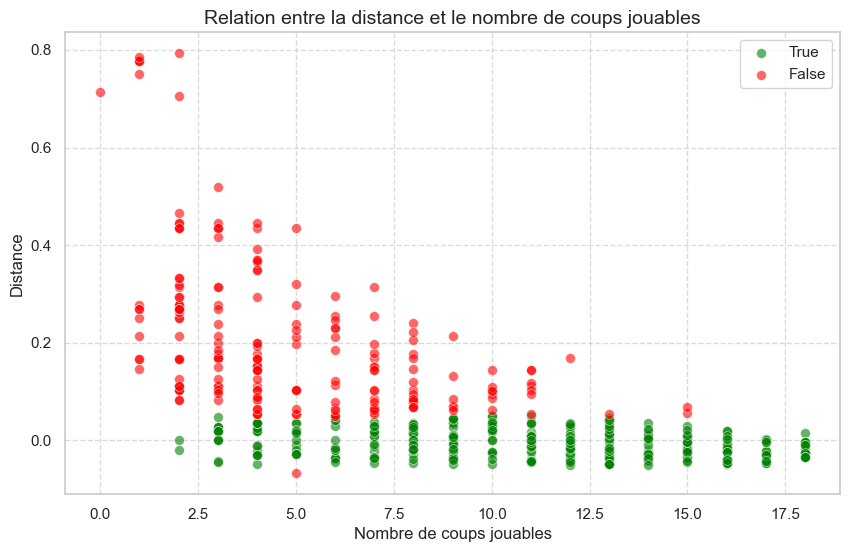

         vp      tour  nbCoup/byTurnW2  nbCoup/byTurnW3  nbCoup/byTurnW4  \
6  0.236886  4.189792              NaN              NaN              NaN   
7  0.236767  4.401121              NaN              NaN              NaN   
2  0.251816  3.850000            1.925         1.908333         2.275000   
3  0.241868  3.908333              NaN         1.691667         1.914583   
4  0.237604  4.820833              NaN              NaN         1.647917   
5  0.227425  4.329583              NaN              NaN              NaN   
1       NaN       NaN            2.675         2.358333         2.500000   

   nbCoup/byTurnW5  nbCoup/byTurnW6  nbCoup/byTurnW7  Distance/byTurnW2  \
6              NaN         1.158750         1.136111                NaN   
7              NaN              NaN         1.079583                NaN   
2         1.953333         1.844861         1.818095           0.005000   
3         1.735000         1.563681         1.617530                NaN   
4         1.4837

In [10]:



import pandas as pd
# Nettoyer les espaces dans les données et convertir les valeurs en entiers
cleaned_data = [[d[0].strip(), d[2].strip(), d[3].strip().split("]")[0]] for d in data]
print(cleaned_data)

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(true_x, true_y, color='green', label='True', s=50, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.scatter(false_x, false_y, color='red', label='False', s=50, alpha=0.6, edgecolors='w', linewidth=0.5)

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Nombre de coups jouables', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Afficher le graphique
plt.title('Relation entre la distance et le nombre de coups jouables', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Définir les dictionnaires
dictionnaire1 = all_graph_stat_vp(liste_of_df)
dictionnaire2 = all_graph_stat_turn(liste_of_df)

# Créer un DataFrame initial avec les dictionnaires
df = pd.DataFrame({'vp': dictionnaire1, 'tour': dictionnaire2})

# Boucle pour ajouter d'autres dictionnaires au DataFrame
for i in range(2, 8):
    temp_dic = number_argument_play(createAgentNumber(i, liste_of_df), i)
    nouveau_df = pd.DataFrame(temp_dic, index=[f"nbCoup/byTurnW{i}"]).T
    df = pd.concat([df, nouveau_df], axis=1)
    
for i in range(2, 8):   
    temp_dic = number_argument_play_zone_de_confort(createAgentNumber(i, liste_of_df), i)
    nouveau_df = pd.DataFrame(temp_dic, index=[f"Distance/byTurnW{i}"]).T
    df = pd.concat([df, nouveau_df], axis=1)

# Afficher le DataFrame
print(df)

print(df["nbCoup/byTurnW2"])
# Exporter le DataFrame au format CSV
pt=path.split("/")[0]
if not os.path.exists("csv/csv_UG"):
        os.mkdir("csv/csv_UG")
df.to_csv(f"csv/csv_UG/{pt}.csv")

In [11]:
import os
import shutil

def get_all_public_graphs(path):
    files_to_load = []

    for filename in os.listdir(path):
        if filename.startswith("A"): # It means it's a public graph file.
            files_to_load.append(os.path.join(path, filename))
    return files_to_load

def get_public_graph_attacks(filepath):
    attacks = []

    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith("att"): # We only want to compare attacks
                # strip newline characters and add it to the attacks list
                attacks.append(line.strip())
    return attacks

def compare_public_graphs(path):
    files = get_all_public_graphs(path)
    attack_groups = {}

    for file in files:
        attacks = get_public_graph_attacks(file)
        # Convert the list of attacks into a tuple
        attack_tuple = tuple(attacks)

        # Check if the attack tuple already exists in the dictionary (as key)
        if attack_tuple in attack_groups:
            attack_groups[attack_tuple].append(file)
        else:
            # If it doesn't, create a new group with the attack tuple as key and file as value
            attack_groups[attack_tuple] = [file]
    return attack_groups

def cluster_public_graphs(directory_path):
    # Compare files to find identical attacks
    result = compare_public_graphs(directory_path)

    # Create a folder for each attack cluster
    for i, (attacks, files) in enumerate(result.items()):
        cluster_folder = os.path.join(directory_path, f"Cluster_{i+1}")
        os.makedirs(cluster_folder, exist_ok=True)
        # Move files from the cluster to the corresponding folder
        for file in files:
            shutil.move(file, cluster_folder)
    

In [12]:
        
folder_path = "replays/"
file_names = os.listdir(folder_path)
file_paths = [os.path.join(folder_path, file_name) for file_name in file_names]
for file_path in file_paths:
    cluster_public_graphs(file_path)

In [13]:
import os

def map_agents_to_debate_number(number: int) -> int:
    """
    Returns the number of agents relative to the debate number.

    Args:
        number (int): The debate number.

    Returns:
        int: The number of agents corresponding to the given debate number.
    """
    return (number - 1) // 20 + 2


cluster_counts_list, cluster_length_list = [], []
cluster_count, cluster_length = 0, 0

for i in range(10):
    cluster_count_by_agent_count = {j:[] for j in range(2, 8)}
    cluster_length_by_agent_count = {j:[] for j in range(2, 8)}
    cluster_counts_list.append(cluster_count_by_agent_count)
    cluster_length_list.append(cluster_length_by_agent_count)

count = 0
file_paths = [os.path.join(folder_path, file_name) for file_name in os.listdir("replays/")]
for debate_path in file_paths:
    # Get informations relative to the current sub debate
    debate_id = debate_path.split("_")[1]
    debate_number = int(debate_id.split("-")[0])
    sub_debate_number = int(debate_id.split("-")[1])
    agent_number = map_agents_to_debate_number(sub_debate_number)

    # Let's count every clusters it contains
    for file in os.listdir(debate_path):
        if(file.startswith("Cluster")):
            cluster_count += 1
            cluster_length += len(os.listdir(os.path.join(debate_path, file)))

    # Update cluster number and cluster length for the right debate for the right number of agents
    cluster_counts_list[debate_number-1][agent_number].append(cluster_count)
    cluster_length_list[debate_number-1][agent_number].append(cluster_length)
    cluster_count, cluster_length =  0, 0



In [14]:
import numpy as np

# Initialisation des listes pour stocker les statistiques
mean_cluster_counts = []
min_cluster_counts = []
max_cluster_counts = []
std_cluster_counts = []

# Parcours de chaque débat dans cluster_counts_list
for cluster_counts_by_agent_count in cluster_counts_list:
    # Initialisation des listes pour stocker les statistiques pour ce débat
    mean_counts_for_debate = []
    min_counts_for_debate = []
    max_counts_for_debate = []
    std_counts_for_debate = []

    # Parcours de chaque nombre d'agents dans ce débat
    for agent_number, cluster_counts in cluster_counts_by_agent_count.items():
        # Calcul des statistiques pour ce nombre d'agents
        mean_count = np.mean(cluster_counts)
        min_count = np.min(cluster_counts)
        max_count = np.max(cluster_counts)
        std_count = np.std(cluster_counts)

        # Ajout des statistiques à la liste pour ce débat
        mean_counts_for_debate.append(mean_count)
        min_counts_for_debate.append(min_count)
        max_counts_for_debate.append(max_count)
        std_counts_for_debate.append(std_count)

    # Ajout des statistiques pour ce débat à la liste principale
    mean_cluster_counts.append(mean_counts_for_debate)
    min_cluster_counts.append(min_counts_for_debate)
    max_cluster_counts.append(max_counts_for_debate)
    std_cluster_counts.append(std_counts_for_debate)

# Affichage des statistiques pour chaque débat
for i, (mean_counts, min_counts, max_counts, std_counts) in enumerate(zip(mean_cluster_counts, min_cluster_counts, max_cluster_counts, std_cluster_counts), start=1):
    print(f"Pour le débat numéro {i} :")
    for agent_number, mean_count, min_count, max_count, std_count in zip(range(2, 8), mean_counts, min_counts, max_counts, std_counts):
        print(f"   Pour {agent_number} agents :")
        print(f"      Moyenne : {mean_count}")
        print(f"      Minimum : {min_count}")
        print(f"      Maximum : {max_count}")
        print(f"      Écart type : {std_count}")


Pour le débat numéro 1 :
   Pour 2 agents :
      Moyenne : 1.25
      Minimum : 1
      Maximum : 2
      Écart type : 0.4330127018922193
   Pour 3 agents :
      Moyenne : 2.0
      Minimum : 1
      Maximum : 6
      Écart type : 1.3038404810405297
   Pour 4 agents :
      Moyenne : 4.45
      Minimum : 1
      Maximum : 16
      Écart type : 3.955692101263697
   Pour 5 agents :
      Moyenne : 9.2
      Minimum : 1
      Maximum : 79
      Écart type : 17.64539600009022
   Pour 6 agents :
      Moyenne : 9.1
      Minimum : 1
      Maximum : 28
      Écart type : 8.245604889879214
   Pour 7 agents :
      Moyenne : 20.65
      Minimum : 1
      Maximum : 118
      Écart type : 29.978784164805617
Pour le débat numéro 2 :
   Pour 2 agents :
      Moyenne : 1.25
      Minimum : 1
      Maximum : 2
      Écart type : 0.4330127018922193
   Pour 3 agents :
      Moyenne : 1.55
      Minimum : 1
      Maximum : 3
      Écart type : 0.6689544080129827
   Pour 4 agents :
      Moyenne : 2.6

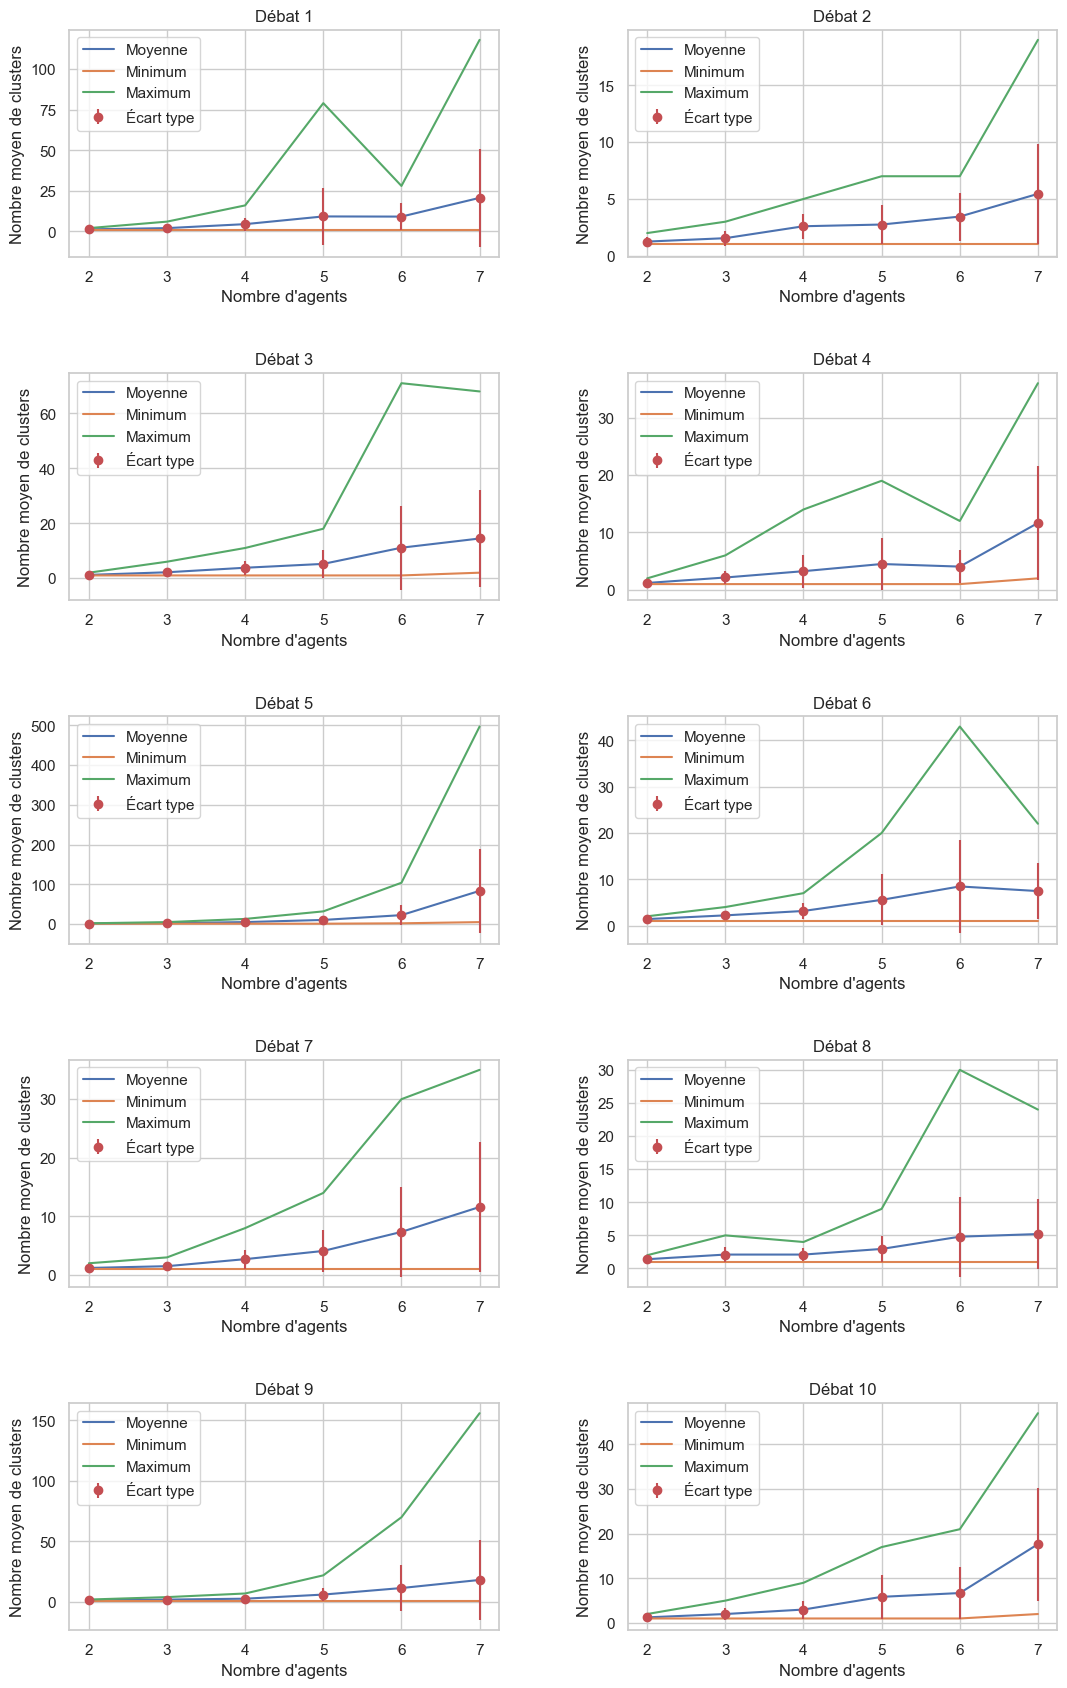

In [15]:
import matplotlib.pyplot as plt

# Création des sous-graphiques
fig, axs = plt.subplots(5, 2, figsize=(12, 18))
fig.tight_layout(pad=5.0)

# Parcours de chaque débat
for i, (mean_counts, min_counts, max_counts, std_counts) in enumerate(zip(mean_cluster_counts, min_cluster_counts, max_cluster_counts, std_cluster_counts), start=1):
    # Calcul du numéro de sous-graphique
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Configuration du sous-graphique
    ax = axs[row, col]
    ax.set_title(f'Débat {i}')
    ax.set_xlabel('Nombre d\'agents')
    ax.set_ylabel('Nombre moyen de clusters')

    # Affichage des statistiques
    agents = range(2, 8)
    ax.plot(agents, mean_counts, label='Moyenne')
    ax.plot(agents, min_counts, label='Minimum')
    ax.plot(agents, max_counts, label='Maximum')
    ax.errorbar(agents, mean_counts, yerr=std_counts, fmt='o', label='Écart type')

    # Légende
    ax.legend()

# Affichage des graphiques
plt.show()


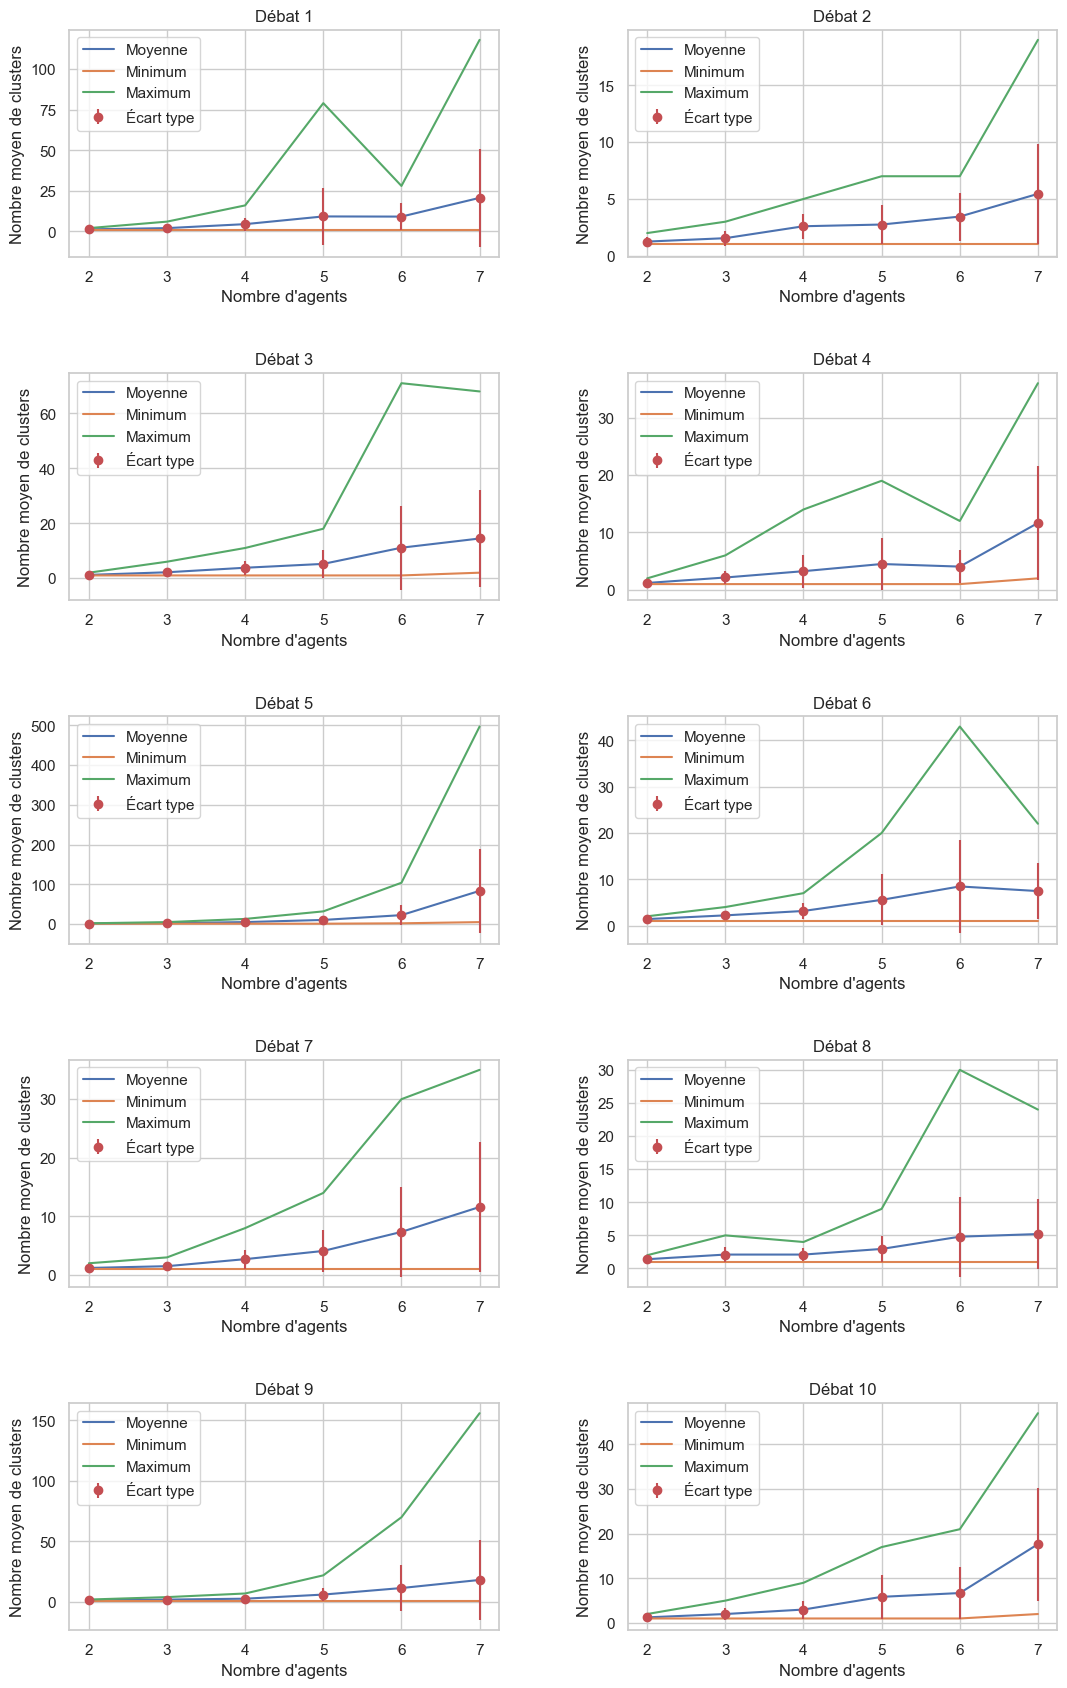

In [16]:
import matplotlib.pyplot as plt

# Création des sous-graphiques
fig, axs = plt.subplots(5, 2, figsize=(12, 18))
fig.tight_layout(pad=5.0)

# Parcours de chaque débat
for i, (mean_counts, min_counts, max_counts, std_counts) in enumerate(zip(mean_cluster_counts, min_cluster_counts, max_cluster_counts, std_cluster_counts), start=1):
    # Calcul du numéro de sous-graphique
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Configuration du sous-graphique
    ax = axs[row, col]
    ax.set_title(f'Débat {i}')
    ax.set_xlabel('Nombre d\'agents')
    ax.set_ylabel('Nombre moyen de clusters')

    # Affichage des statistiques
    agents = range(2, 8)
    ax.plot(agents, mean_counts, label='Moyenne')
    ax.plot(agents, min_counts, label='Minimum')
    ax.plot(agents, max_counts, label='Maximum')
    ax.errorbar(agents, mean_counts, yerr=std_counts, fmt='o', label='Écart type')

    # Légende
    ax.legend()

# Affichage des graphiques
plt.show()


C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


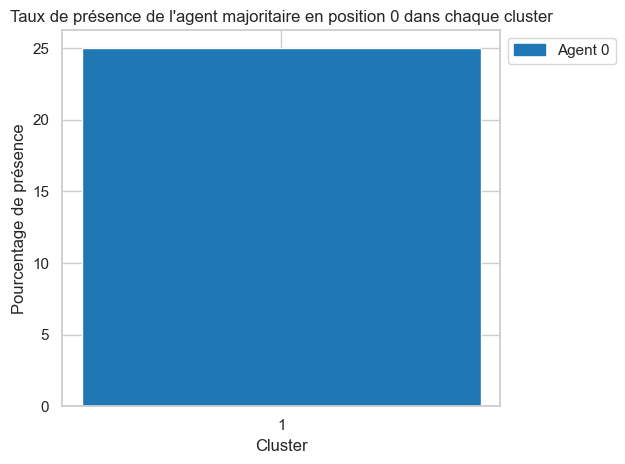

C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


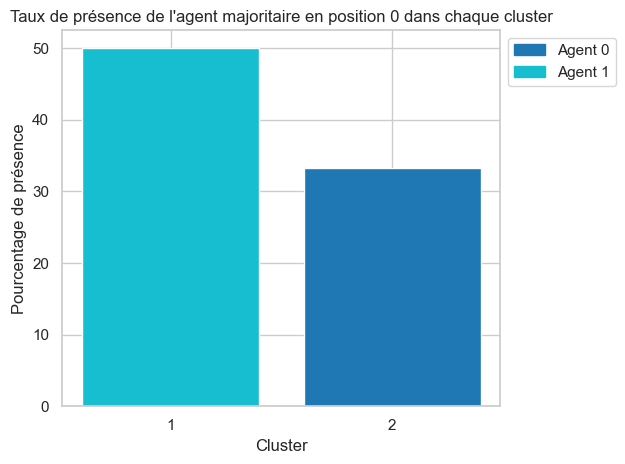

C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


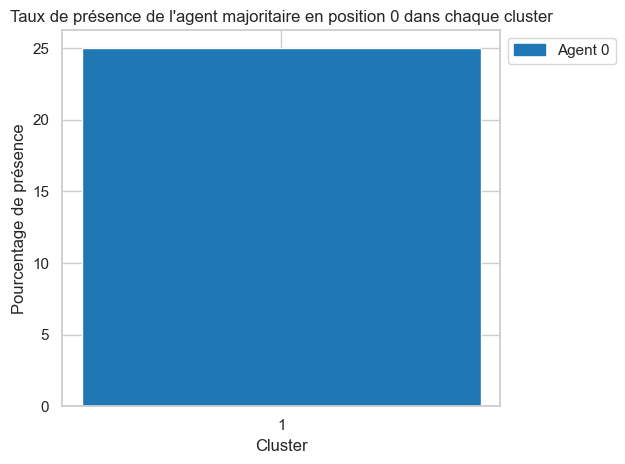

C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


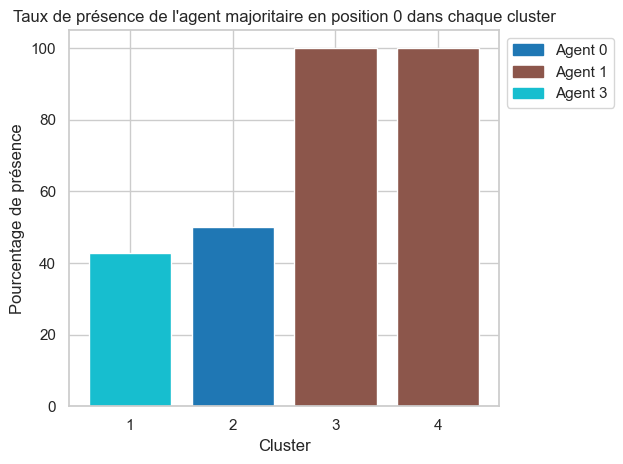

C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


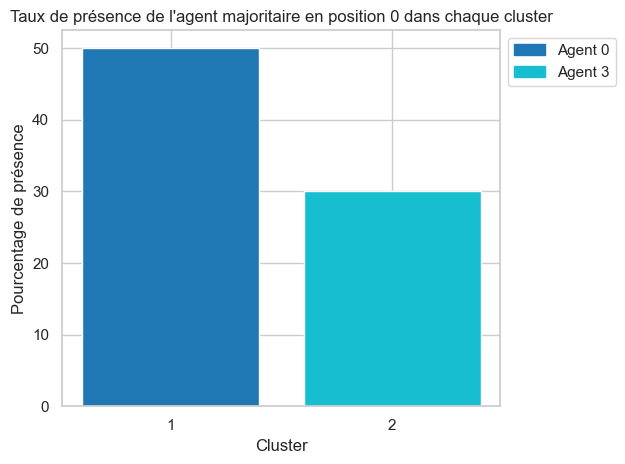

C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


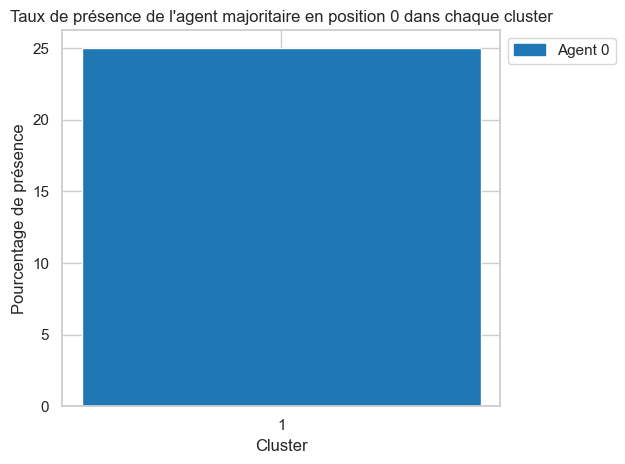

C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


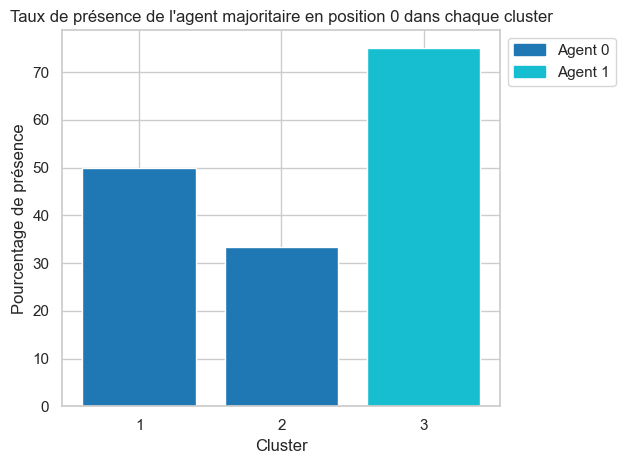

C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


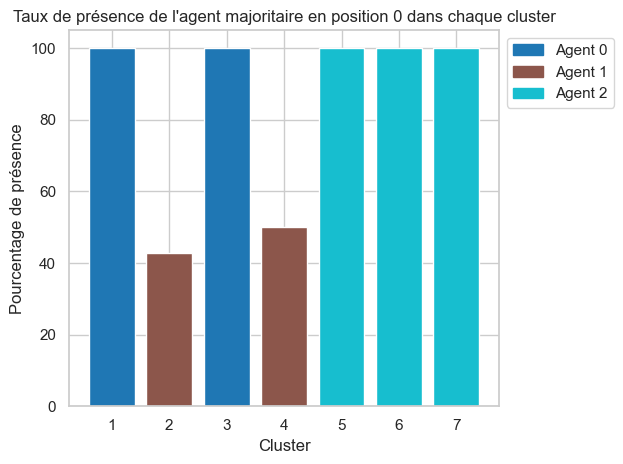

C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


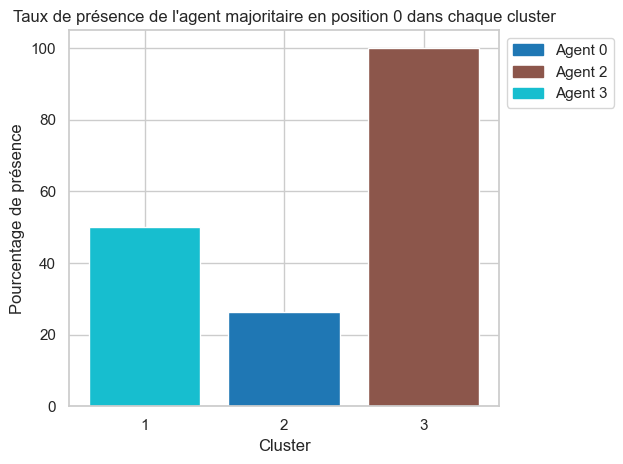

C:\Users\Nassim\AppData\Local\Temp\ipykernel_22248\4062389668.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs


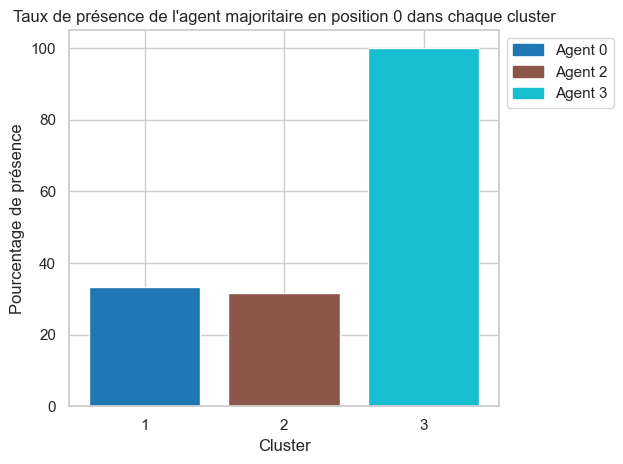

In [17]:
import os
import matplotlib.pyplot as plt

def calculate_most_present_agent_per_cluster(debate_path, position):
    sub_debate_number = int(debate_path.split("-")[1])
    agent_number = map_agents_to_debate_number(sub_debate_number)
    most_present_data = []

    for file in os.listdir(debate_path):
        if file.startswith("Cluster"):
            cluster = {i:0 for i in range(agent_number)}
            cluster_length = 0
            for apx in os.listdir(os.path.join(debate_path, file)):
                cluster_length += 1
                agent_in_pos = int(apx.split(".")[0].split(",")[position][1:])
                cluster[agent_in_pos] += 1
            most_present_count = max(cluster.values())
            most_present_agent = max(cluster, key=cluster.get)
            most_present_agent_percentage = (most_present_count / cluster_length) * 100
            most_present_data.append((most_present_agent, most_present_count, most_present_agent_percentage))
                
    return most_present_data

def plot_most_present_agent_per_cluster(most_present_data, position):
    cluster_indices = np.arange(1, len(most_present_data) + 1)
    
    unique_agents = list(set(agent for agent, _, _ in most_present_data))
    num_agents = len(unique_agents)
    color_palette = plt.cm.get_cmap('tab10', num_agents)  # Palette de couleurs
    
    agent_colors = {agent: color_palette(i) for i, agent in enumerate(unique_agents)}  # Mapper chaque agent à une couleur unique
    
    # Dictionnaire pour stocker les légendes sans répétition
    legend_labels = {agent: f"Agent {agent}" for agent in unique_agents}
    
    for i, (agent, _, percentage) in enumerate(most_present_data):
        color = agent_colors[agent]
        plt.bar(cluster_indices[i], percentage, color=color)

    # Création de la légende
    legend_handles = [plt.Rectangle((0,0),1,1, color=agent_colors[agent]) for agent in agent_colors]
    plt.legend(legend_handles, [legend_labels[agent] for agent in agent_colors], loc='upper left', bbox_to_anchor=(1, 1))

    plt.xlabel('Cluster')
    plt.ylabel('Pourcentage de présence')
    plt.title(f'Taux de présence de l\'agent majoritaire en position {position} dans chaque cluster')
    
    # Espacement des nombres sur l'axe des abscisses avec une taille de figure plus grande
    # plt.figure(figsize=(len(cluster_indices)*0.7, 6))
    
    plt.xticks(cluster_indices, cluster_indices)
    
    plt.tight_layout()  # Ajuste automatiquement les paramètres de la disposition pour éviter les chevauchements
    plt.show()


for i in range(10):
    debate_path = f"replays/debate_9-{i+41}"
    most_present_data = calculate_most_present_agent_per_cluster(debate_path, 0)
    plot_most_present_agent_per_cluster(most_present_data, 0)